In [1]:
import tensorflow as tf 

In [2]:
#an actual residual block, needs init and call 
#init defines all the layesr 
class ResNetBlock(tf.keras.Model):
  def __init__(self, filters, kernel_size):

    super(ResNetBlock, self).__init__(name='')
    self.filters = filters
    self.kernel_size = kernel_size; 

    self.conv_layer1 = tf.keras.layers.Conv2D(self.filters, self.kernel_size, padding='same')
    self.batch_norm1 = tf.keras.layers.BatchNormalization()

    self.conv_layer2 = tf.keras.layers.Conv2D(self.filters, self.kernel_size, padding='same')
    self.batch_norm2 = tf.keras.layers.BatchNormalization()

    self.activation = tf.keras.layers.Activation('relu') 
    self.add = tf.keras.layers.Add()

  
  def call(self, input_tensor):

    x = self.conv_layer1(input_tensor)
    x = self.batch_norm1(x)
    x = self.conv_layer2(x)
    x = self.batch_norm2(x)
    x = self.add([x, input_tensor])
    x = self.activation(x)

    return x 


In [3]:
class ResNet(tf.keras.Model):
  def __init__(self, num_classes):
    super(ResNet, self).__init__(name='')
    # we need convolution followed by max pool into resnet blocks into global pool into fully connnected network
    self.conv1 = tf.keras.layers.Conv2D(64, 7)
    self.activation_1 = tf.keras.layers.Activation('relu')
    self.maxpool2d_1 = tf.keras.layers.MaxPool2D(pool_size=(2,2))

    self.block1 = ResNetBlock(64, 3)
    self.block2 = ResNetBlock(64, 3)

    self.global_pool = tf.keras.layers.GlobalAveragePooling2D() 
    self.dense = tf.keras.layers.Dense(num_classes, activation='softmax')

  def call(self, input):
    x = self.conv1(input)
    x = self.activation_1(x)
    x = self.maxpool2d_1(x)

    x = self.block1(x)
    x = self.block2(x)

    x = self.global_pool(x)
    x = self.dense(x)

    return x 

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [22]:
import numpy as np
length, height, width, channels = x_train.shape[0], x_train.shape[1], x_train.shape[2], 1 
x_train = np.reshape(x_train, (length, height, width, channels))
length, height, width, channels = x_test.shape[0], x_test.shape[1], x_test.shape[2], 1
x_test = np.reshape(x_test, (length, height, width, channels))

In [26]:
x_train = tf.cast(x_train, tf.float32) / 255. 
x_test = tf.cast(x_test, tf.float32) / 255. 

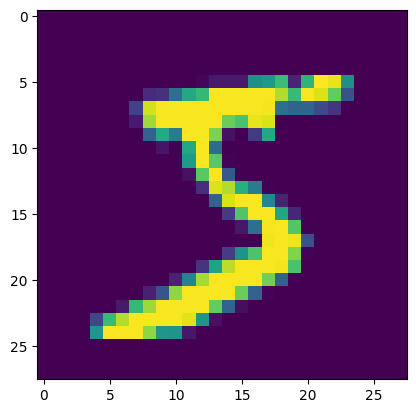

In [29]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])

In [28]:
model = ResNet(10)
#need sparse categorical because did not change labels to 1 hot encoding
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=1, validation_data=(x_test, y_test))

1875/1875 [==============================] - 187s 99ms/step - loss: 0.1443 - accuracy: 0.9640 - val_loss: 0.0811 - val_accuracy: 0.9743


1/1 [==============================] - 0s 16ms/step
Label:  1
Prediction:  1


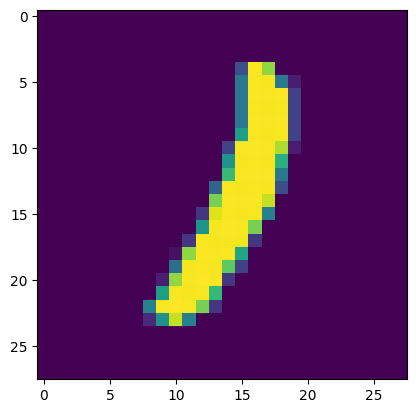

In [38]:
ind = 78
pred = model.predict(tf.Variable([x_train[ind]]))
plt.imshow(x_train[ind])
print("Label: ", y_train[ind])
print("Prediction: ", np.argmax(pred))